# Lab 3: Exploring 1D Data Visualizations

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/AirIndia.csv')

In [6]:
df.columns = [col.strip().replace('\n','') for col in df.columns]
print(df.columns)

Index(['Month', 'DEPARTURES', 'HOURS', 'KILOMETER\r(TH)', 'PASSENGERS CARRIED',
       'PASSENGER KMS. PERFORMED\r(TH)', 'AVAILABLE SEAT KILOMETRE\r(TH)',
       'PAX. LOAD FACTOR#\r(IN %)', 'FY'],
      dtype='object')


In [7]:
num_cols = ['DEPARTURES', 'HOURS', 'KILOMETER\r(TH)', 'PASSENGERS CARRIED',
            'PASSENGER KMS. PERFORMED\r(TH)', 'AVAILABLE SEAT KILOMETRE\r(TH)', 'PAX. LOAD FACTOR#\r(IN %)']

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

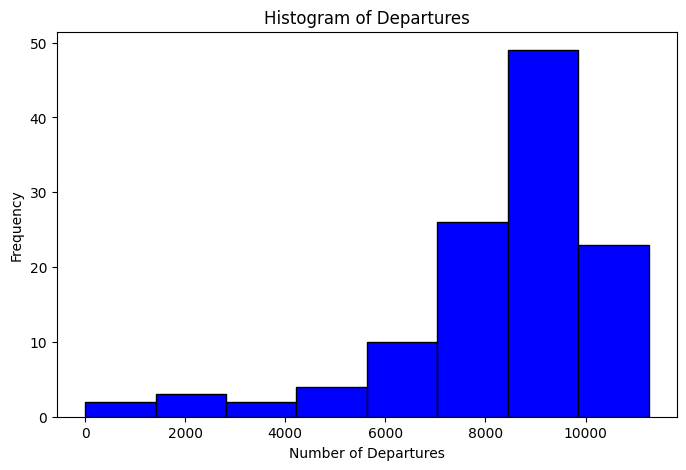

Dataset Source: AirIndia.csv contains monthly airline operation stats.
Feature: DEPARTURES - Number of flights departed each month.



In [10]:
plt.figure(figsize=(8,5))
plt.hist(df['DEPARTURES'].dropna(), bins=8, color='blue', edgecolor='black')
plt.title('Histogram of Departures')
plt.xlabel('Number of Departures')
plt.ylabel('Frequency')
plt.show()

print("Dataset Source: AirIndia.csv contains monthly airline operation stats.")
print("Feature: DEPARTURES - Number of flights departed each month.\n")

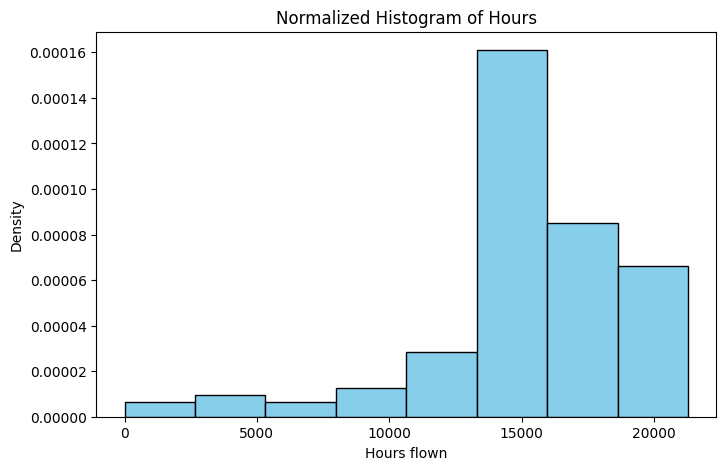

Feature: HOURS - Total flying hours per month, shown as density.



In [13]:
plt.figure(figsize=(8,5))
plt.hist(df['HOURS'].dropna(), bins=8, color='skyblue', edgecolor='black', density=True)
plt.title('Normalized Histogram of Hours')
plt.xlabel('Hours flown')
plt.ylabel('Density')
plt.show()

print("Feature: HOURS - Total flying hours per month, shown as density.\n")

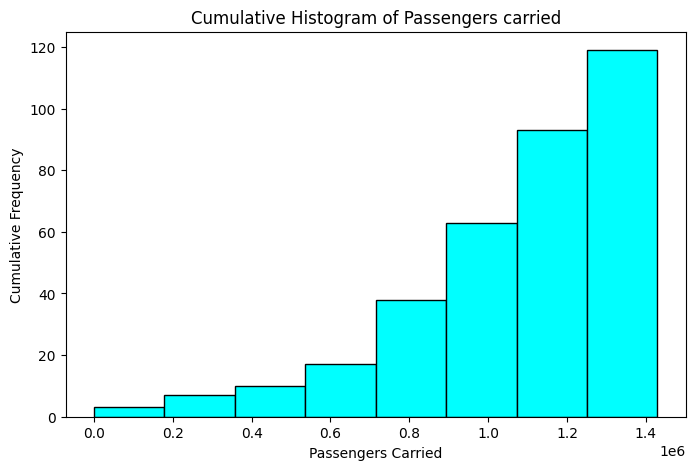

Feature: PASSENGERS CARRIED - Cumulative count of passengers per month.



In [14]:
plt.figure(figsize=(8,5))
plt.hist(df['PASSENGERS CARRIED'].dropna(), bins=8, cumulative=True, color='cyan', edgecolor='black')
plt.title('Cumulative Histogram of Passengers carried')
plt.xlabel('Passengers Carried')
plt.ylabel('Cumulative Frequency')
plt.show()

print("Feature: PASSENGERS CARRIED - Cumulative count of passengers per month.\n")

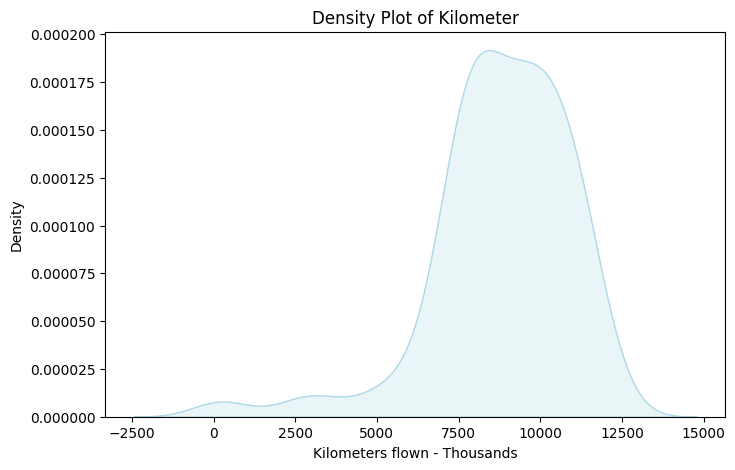

Feature: KILOMETER(TH) - Distribution of distance flown in thousands of km.



In [20]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['KILOMETER\r(TH)'].dropna(), fill=True, color='lightblue')
plt.title('Density Plot of Kilometer')
plt.xlabel('Kilometers flown - Thousands')
plt.ylabel('Density')
plt.show()

print("Feature: KILOMETER(TH) - Distribution of distance flown in thousands of km.\n")

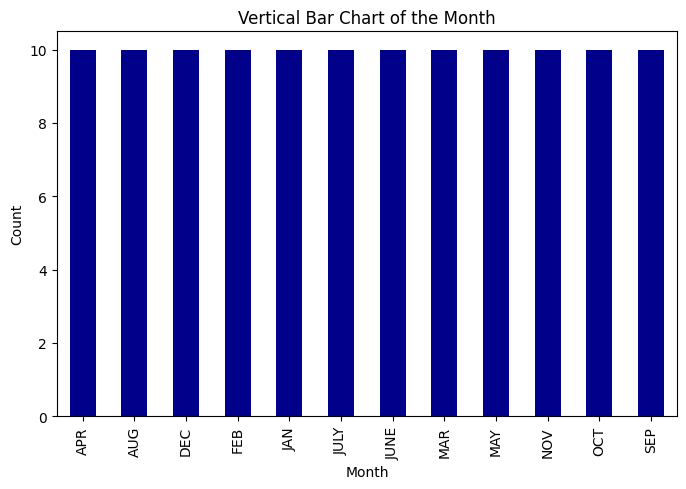

Feature: Month - Count of records per month (categorical).



In [22]:
plt.figure(figsize=(8,5))
df['Month'].value_counts().sort_index().plot(kind='bar', color='darkblue')
plt.title('Vertical Bar Chart of the Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

print("Feature: Month - Count of records per month (categorical).\n")

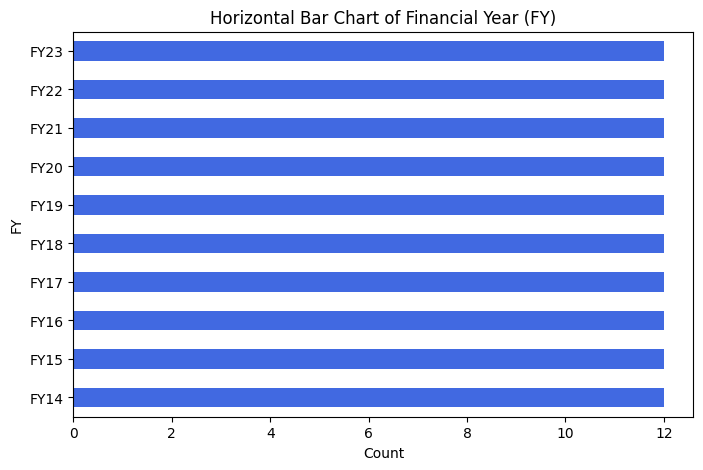

Feature: FY - Distribution of data by financial year.



In [25]:
plt.figure(figsize=(8,5))
df['FY'].value_counts().plot(kind='barh', color='royalblue')
plt.title('Horizontal Bar Chart of Financial Year (FY)')
plt.xlabel('Count')
plt.ylabel('FY')
plt.show()

print("Feature: FY - Distribution of data by financial year.\n")

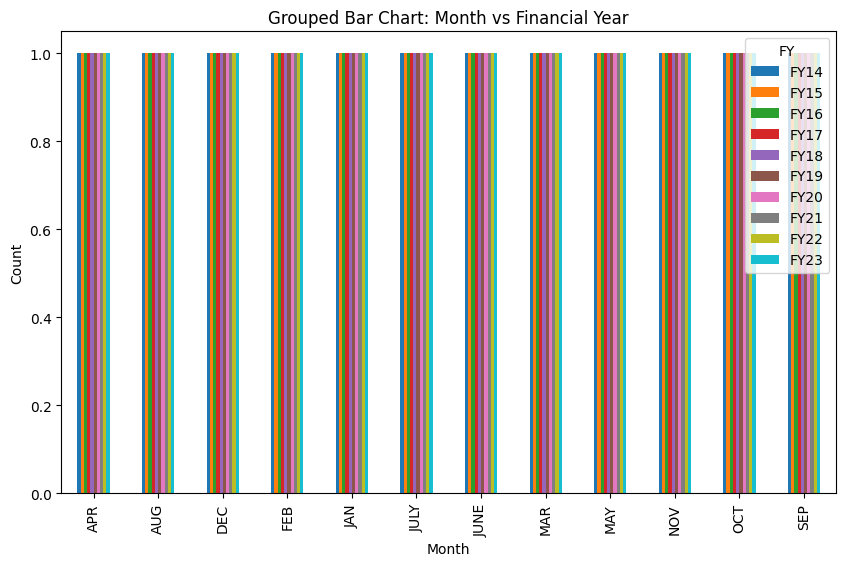

Grouped counts of months split by financial year.



In [26]:
cross_tab = pd.crosstab(df['Month'], df['FY'])
cross_tab.plot(kind='bar', figsize=(10,6))
plt.title('Grouped Bar Chart: Month vs Financial Year')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

print("Grouped counts of months split by financial year.\n")

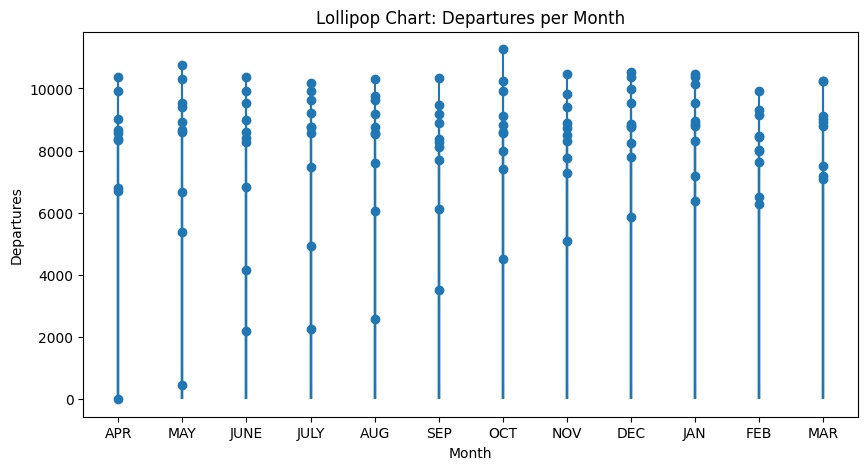

Departures lollipop chart showing number of departures each month.



In [27]:
plt.figure(figsize=(10,5))
plt.stem(df['Month'], df['DEPARTURES'], basefmt=" ")
plt.title('Lollipop Chart: Departures per Month')
plt.xlabel('Month')
plt.ylabel('Departures')
plt.show()

print("Departures lollipop chart showing number of departures each month.\n")

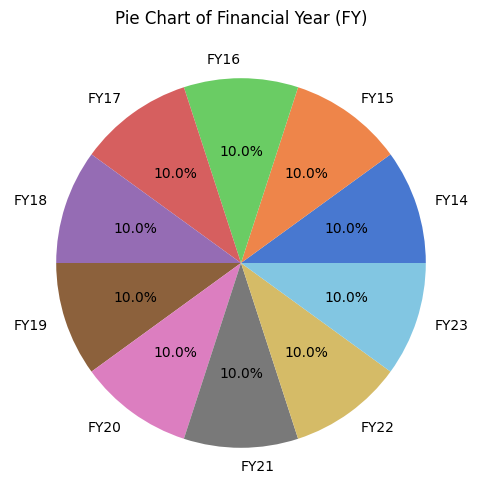

Proportion of records in each financial year (FY).



In [28]:
plt.figure(figsize=(6,6))
df['FY'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('muted'))
plt.title('Pie Chart of Financial Year (FY)')
plt.ylabel('')
plt.show()

print("Proportion of records in each financial year (FY).\n")

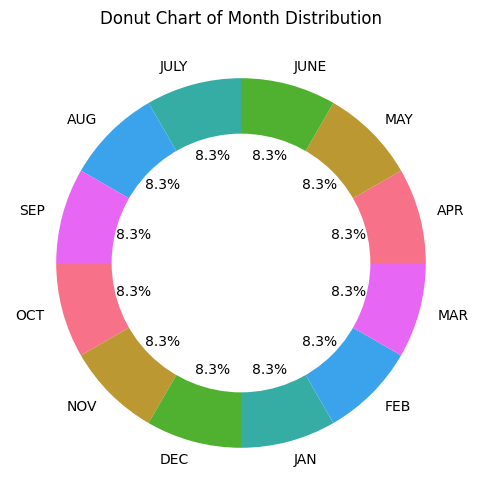

Donut chart showing proportion of data per month.



In [30]:
plt.figure(figsize=(6,6))
sizes = df['Month'].value_counts()
plt.pie(sizes, labels=sizes.index, autopct='%1.1f%%', colors=sns.color_palette('husl'))
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Donut Chart of Month Distribution')
plt.show()

print("Donut chart showing proportion of data per month.\n")

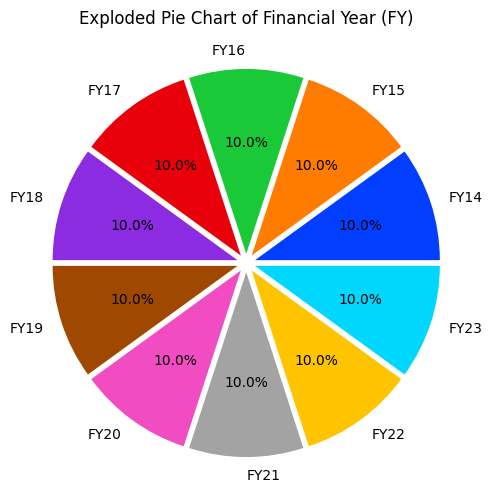

Exploded pie chart to emphasize FY distribution.



In [31]:
plt.figure(figsize=(6,6))
explode = [0.05]*len(df['FY'].unique())
df['FY'].value_counts().plot.pie(autopct='%1.1f%%', explode=explode, colors=sns.color_palette('bright'))
plt.title('Exploded Pie Chart of Financial Year (FY)')
plt.ylabel('')
plt.show()

print("Exploded pie chart to emphasize FY distribution.\n")


In [32]:
desc = df['DEPARTURES'].describe()
print(f"Statistical Summary for DEPARTURES:\n{desc}\n")

Statistical Summary for DEPARTURES:
count      119.000000
mean      8247.680672
std       2036.087774
min          0.000000
25%       7656.500000
50%       8732.000000
75%       9520.500000
max      11262.000000
Name: DEPARTURES, dtype: float64



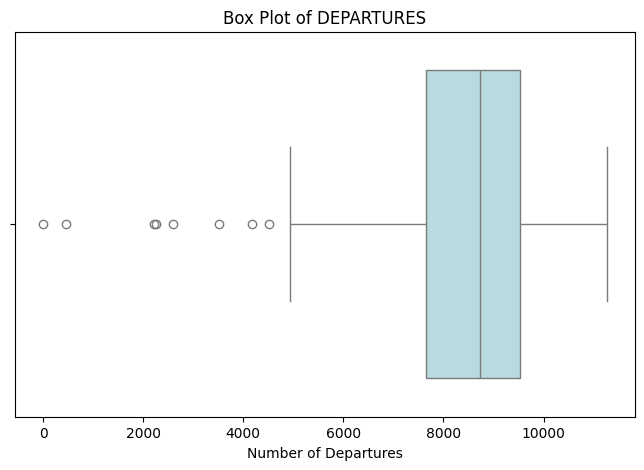

In [33]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['DEPARTURES'], color='powderblue')
plt.title('Box Plot of DEPARTURES')
plt.xlabel('Number of Departures')
plt.show()

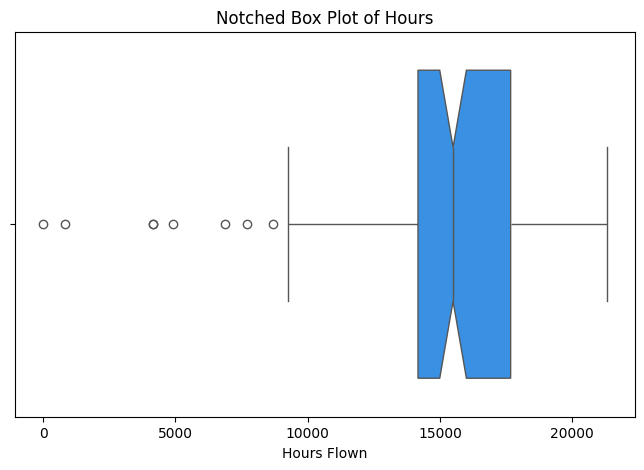

In [37]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['HOURS'], notch=True, color='dodgerblue')
plt.title('Notched Box Plot of Hours')
plt.xlabel('Hours Flown')
plt.show()

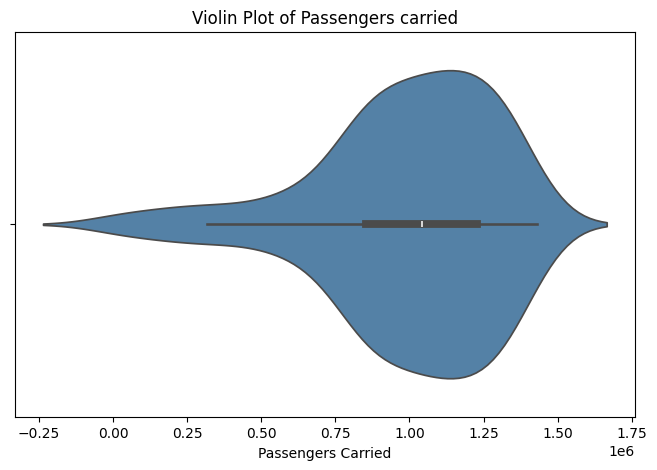

In [38]:
plt.figure(figsize=(8,5))
sns.violinplot(x=df['PASSENGERS CARRIED'], color='steelblue')
plt.title('Violin Plot of Passengers carried')
plt.xlabel('Passengers Carried')
plt.show()

<ipython-input-41-5cf0ae9dca20>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FY', y='PASSENGERS CARRIED', data=df, palette='coolwarm')


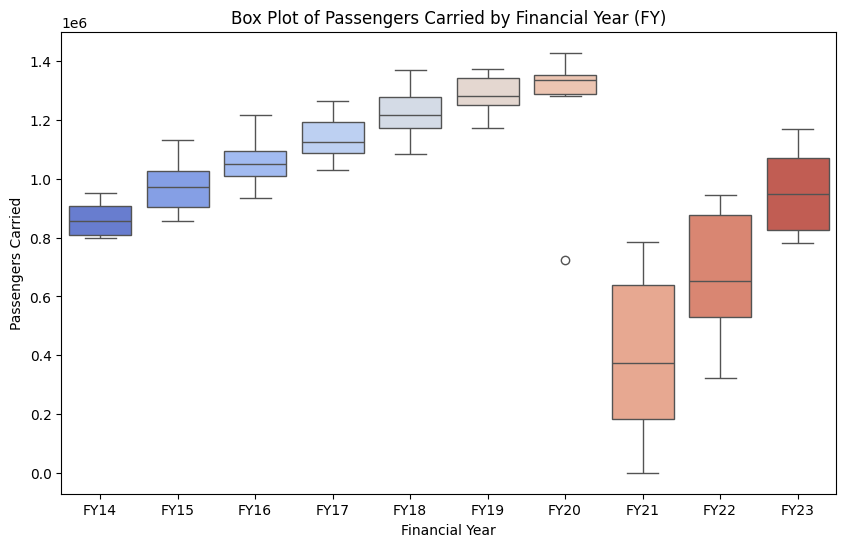

In [41]:
plt.figure(figsize=(10,6))
sns.boxplot(x='FY', y='PASSENGERS CARRIED', data=df, palette='coolwarm')
plt.title('Box Plot of Passengers Carried by Financial Year (FY)')
plt.xlabel('Financial Year')
plt.ylabel('Passengers Carried')
plt.show()